Names: Vicente Valenzuela, Becca Rust, Liliane Stewart, Grace Watts

## WorkSheet Instructions ##

Before you begin you should have read and worked through Lab 4.

 I recommend that you do this worksheet in a python
  notebook and share screen.  This method does mean one person will do the typing.  When complete, print or Latex to pdf and upload to CANVAS.
  

Q1. From the following tableau, which includes an embedded higher-order Runge Kutta, write out the equations for the Runge-Kutta method (including all k terms, and the term for $y_{n+1}$ for:

a. the embedded 4th order scheme

b. the 5th order scheme

c. an estimate of the truncation error of the 4th order scheme

$$
\begin{array}{|c|c|cccccc|c|c|} \hline
i & a_i & {b_{ij}} & & & & &  & c_i & c^*_i \\ \hline
1 &  &  &  &  & &  &  & \frac{37}{378} & \frac{2825}{27648}\\
2 & \frac{1}{5} & \frac{1}{5}&  &  & &  & & 0 &0 \\
3 & \frac{3}{10} & \frac{3}{40}&\frac{9}{40}&  & & &  &\frac{250}{621}&\frac{18575}{48384}\\
4 &  \frac{3}{5}&\frac{3}{10}& -\frac{9}{10}&\frac{6}{5}& & &  &\frac{125}{594}& \frac{13525}{55296}\\
5 & 1 & -\frac{11}{54}&\frac{5}{2}&-\frac{70}{27}&\frac{35}{27}&  &  & 0 & \frac{277}{14336}\\
6 &  \frac{7}{8}&  \frac{1631}{55296}&  \frac{175}{512}&\frac{575}{13824}& \frac{44275}{110592}& \frac{253}{4096}&  & \frac{512}{1771} & \frac{1}{4}\\\hline
{j=} & & 1 & 2 & 3 & 4 & 5 & 6 & & \\ \hline
\end{array}
$$

Q2. Write out the tableau for Heun’s/Ralston method, described by:
$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
$$

*This is part of Problem Tableau from the lab*

Q3. Now we'll revisit the simple un-damped harmonic oscillator (that we first saw in lab 1) with $\beta = 0$:
$$\frac{d^2 y}{d t^2} = {- \gamma y}$$

re-writing, with $u=dy/dt$. Then:

\begin{align}
\frac{dy}{dt} &= u\\
\frac{du}{dt} &= - {\gamma} y
\end{align}

In this un-damped system, the solution is $y = sin(\sqrt \gamma t)$ 

This question will explore using various different methods to solve this equation in time. The following code solves this set of 2 ODEs using the forward Euler method. 

In [1]:
import json
import numpy as np
from collections import namedtuple

# Since we need to keep track of both y, and dy/dt (=u), we will define a 2D array of y:
# The first dimension, y[0], will hold successive y values
# The second dimension, y[1], will hold successive u values

#
# specify the derivative function
#
def derivs_oscillator(coeffs, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
                     # the first dimension is holding dy/dt
                     # the second dimension is holding d2y/dt2 (i.e. du/dt)
  f[0]=y[1] # Recall that y[1] = u
  f[1]= -1.*coeffs.gm*y[0]
  return f

# function to step forward one timestep using forward Euler: y_i+1 = y_i + dy/dt_i
def euler(coeffs,y,derivs):
  ynew=y + coeffs.dt*derivs(coeffs,y)
  return ynew

# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.1,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_euler=np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=euler(coeffs,y,derivs_oscillator)
    ys_euler[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u



Q3.1  Plot the resulting y values. Is this behaviour physical? Is this behaviour expected? Why/why not?

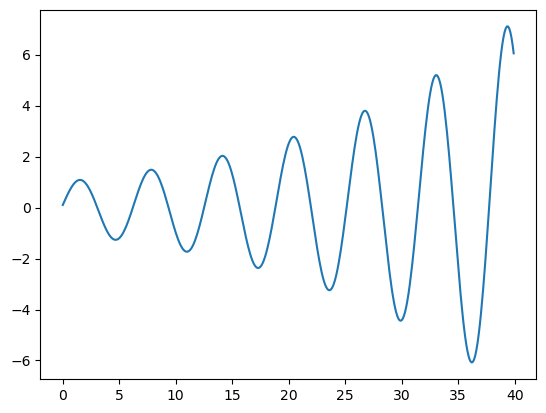

In [2]:
import matplotlib.pyplot as plt
plt.plot(time,ys_euler)
# There's no physical reason why the function amplitude is increasing with time, it's just an aproxximation problem with the foward euler

Q3.2 Now adapt the code provided above to use the mid-point method instead of forward Euler. How does this change the solution? Is this expected?

Mid-point method:
$$
\begin{aligned}
   \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{1}{2}k_1, t_n+\frac{1}{2}h)\\
    y_{n+1} = y_n + k_2
  \end{array}
\end{aligned}
$$ 

In [3]:
# Since we need to keep track of both y, and dy/dt (=u), we will define a 2D array of y:
# The first dimension, y[0], will hold successive y values
# The second dimension, y[1], will hold successive u values

#
# specify the derivative function
#
def derivs_oscillator(coeffs, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
                     # the first dimension is holding dy/dt
                     # the second dimension is holding d2y/dt2 (i.e. du/dt)
  f[0]=y[1] # Recall that y[1] = u
  f[1]= -1.*coeffs.gm*y[0]
  return f

# function to step forward one timestep using forward Euler: y_i+1 = y_i + dy/dt_i
# we need to rewrite as y_i+1= 
#def midpoint(coeffs,y,derivs):
#  ynew=y + 0.5*coeffs.dt*derivs(coeffs,y)
#  return ynew
def midpoint(coeff, y, derivs):
    midy=y + 0.5 * coeff.dt * derivs(coeff,y)
    y = y + coeff.dt*derivs(coeff,midy)
    return y

# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.1,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_midpoint=np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=midpoint(coeffs,y, derivs_oscillator)
    ys_midpoint[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u



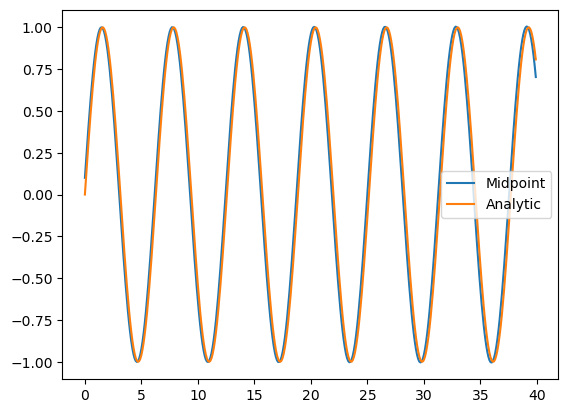

In [4]:
plt.plot(time,ys_midpoint,label='Midpoint')
plt.plot(time,np.sin(time),label='Analytic')
plt.legend()


Q3.3 Adapt the code again to use Heun's method, as from Q2. Plot the results, and compare to the forward Euler and mid-point methods. (Compare the errors from the analytical solution)

# Since we need to keep track of both y, and dy/dt (=u), we will define a 2D array of y:
# The first dimension, y[0], will hold successive y values
# The second dimension, y[1], will hold successive u values
# 
# for k1=0
# for k2=
#
import json
import numpy as np
from collections import namedtuple
# specify the derivative function
#
def derivs_oscillator(coeffs, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
                     # the first dimension is holding dy/dt
                     # the second dimension is holding d2y/dt2 (i.e. du/dt)
  f[0]=y[1] # Recall that y[1] = u
  f[1]= -1.*coeffs.gm*y[0]
  return f

# function to step forward one timestep using forward Euler: y_i+1 = y_i + dy/dt_i
# we need to rewrite as y_i+1= 
#def midpoint(coeffs,y,derivs):
#  ynew=y + 0.5*coeffs.dt*derivs(coeffs,y)
#  return ynew
def midpoint(coeff, y, derivs):
    midy=y + 0.5 * coeff.dt * derivs(coeff,y)
    y = y + coeff.dt*derivs(coeff,midy)
    return y
#
def euler(coeffs,y,derivs):
  ynew=y + coeffs.dt*derivs(coeffs,y)
  return ynew
#
def heun(coeff, y, derivs): 
   # need to add K1 as code: 
   k1 = coeff.dt*derivs(coeff,y)
   k2 = coeff.dt*derivs(coeff,y+(2.0/3.0)*k1)
   #y_first = y + (2/3)*(coeff.dt*derivs(coeff,y)) #+ (3/4)*(coeff.dt*derivs(coeff,y))
   y_heun = y + (1.0/4.0)*k1 + (3.0/4.0)*k2
   return y_heun
# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.05,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial
ynew=coeffs.yinitial
y_heun=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_euler=np.empty([nsteps],np.float64)
ys_midpoint=np.empty([nsteps],np.float64)
ys_heun=np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=midpoint(coeffs,y, derivs_oscillator)
    ys_midpoint[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u
    ynew=euler(coeffs,ynew,derivs_oscillator)
    ys_euler[i]=ynew[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u
    y_heun=heun(coeffs,y_heun,derivs_oscillator)
    ys_heun[i]=y_heun[0]
    

Heun’s/Ralston method, described by:
$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
$$

In [5]:
# Since we need to keep track of both y, and dy/dt (=u), we will define a 2D array of y:
# The first dimension, y[0], will hold successive y values
# The second dimension, y[1], will hold successive u values
# 
#
import json
import numpy as np
from collections import namedtuple
# specify the derivative function
#
def derivs_oscillator(coeffs, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
                     # the first dimension is holding dy/dt
                     # the second dimension is holding d2y/dt2 (i.e. du/dt)
  f[0]=y[1] # Recall that y[1] = u
  f[1]= -1.*coeffs.gm*y[0]
  return f

# function to step forward one timestep using forward Euler: y_i+1 = y_i + dy/dt_i
# we need to rewrite as y_i+1= 
#def midpoint(coeffs,y,derivs):
#  ynew=y + 0.5*coeffs.dt*derivs(coeffs,y)
#  return ynew
def midpoint(coeff, y, derivs):
    midy=y + 0.5 * coeff.dt * derivs(coeff,y)
    y = y + coeff.dt*derivs(coeff,midy)
    return y
#
def euler(coeffs,y,derivs):
  ynew=y + coeffs.dt*derivs(coeffs,y)
  return ynew
#
def heun(coeff, y, derivs): 
   # need to add K1 as code: 
   k1 = coeff.dt*derivs(coeff,y)
   k2 = coeff.dt*derivs(coeff,y+(2.0/3.0)*k1)
   #y_first = y + (2/3)*(coeff.dt*derivs(coeff,y)) #+ (3/4)*(coeff.dt*derivs(coeff,y))
   y_heun = y + (1.0/4.0)*k1 + (3.0/4.0)*k2
   return y_heun
# set coefficients including initial conditions:
initialVals = {
    'yinitial': [0., 1.],
    't_beg': 0.,
    't_end': 40.,
    'dt': 0.1,
    'gm': 1.
}

initvals = namedtuple('initvals',
                      'dt gm t_beg t_end yinitial')
coeffs = initvals(**initialVals)


# create numpy of times
time=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

# set initial value of y
y=coeffs.yinitial
ynew=coeffs.yinitial
y_heun=coeffs.yinitial

#calculate the number of steps by the length of our time array
nsteps=len(time)

#
# integrate and save the result in array ys
#
ys_euler=np.empty([nsteps],np.float64)
ys_midpoint=np.empty([nsteps],np.float64)
ys_heun=np.empty([nsteps],np.float64)

for i in range(nsteps):
    # calculate new values of y for each timestep, by passing the derivs_oscillator function as an argument:
    y=midpoint(coeffs,y, derivs_oscillator)
    ys_midpoint[i]=y[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u
    ynew=euler(coeffs,ynew,derivs_oscillator)
    ys_euler[i]=ynew[0] # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u
    y_heun=heun(coeffs,y_heun,derivs_oscillator)
    ys_heun[i]=y_heun[0]
    



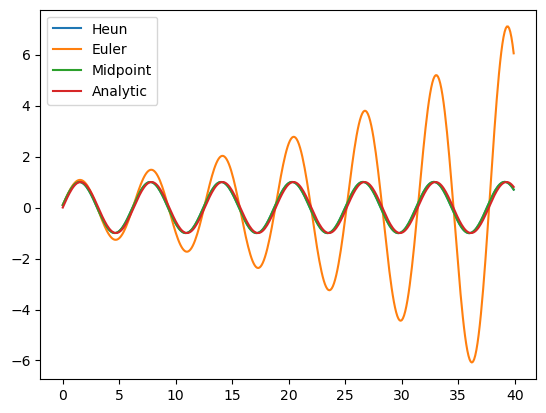

In [6]:
plt.plot(time,ys_heun,label='Heun')
plt.plot(time,ys_euler,label='Euler')
plt.plot(time,ys_midpoint,label='Midpoint')
plt.plot(time,np.sin(time),label='Analytic')
plt.legend()

Optional Q3.4 - repeat Q3.3 but with a 4th order Runge-Kutta scheme.  